# Biodiversity : A Study of US National Parks

## Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Some of the questions explored in this project include:

- What is the distribution of conservation status for species? 
- Are certain types of species more likely to be endangered?
- Are the differences between parks and the amount of species observed to have a conservation status significant?

### Data source
All data sourced in this analysis (comprising of `observations.csv` and `species_info.csv`) was provided by CodeCademy at [Codecademy.com](https://www.codecademy.com).

## Project Scope

The scope of this project involves setting goals in order to define the objectives and intentions of the project, checking these against the datasets explored, analysing the data appropriately to obtain information that aligns with the project goals, and lastly evaluation to develop suitable conclusions from the findings observed in the analysis section.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species? 
- Are certain types of species more likely to be endangered?
- Are the differences between parks and the amount of species observed to have a conservation status significant?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Observations of species in parks. 

### Evaluation

The evaluation will reflect on the conclusions developed, touching on the methodologies of the project's analysis, as well as the limitations of these as well as of the datasets themselves.

## Import Python Modules

The first step is to import the key modules used in this analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

## Loading the Data


To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.


### Species



The `species_info.csv` is a file containing information on species and their conservation status.

It has four columns:

- **category** - class of a species
- **scientific_name** - scientific name of species
- **common_names** - common name of species
- **conservation_status** - status of conservation of species

Below, the file has been read into a dataframe and the first five rows are visible.

In [15]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Observations

The `observations.csv` is a file containing information on the observations recorded for each species within a national park.

It has three columns:

- **scientific_name**
- **park_name**
- **observations**

Below, the file has been read into a dataframe and the first five rows are visible.

In [17]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Data Characteristics

With the data now read in as dataframes, it is useful to perform some Exploratory Data Analysis (EDA) to provide us with a high-level understanding of the data fields, as well as help us identify which columns have missing data. 

In [20]:
print('Species: ' + str(species.shape))
print('Observations: ' + str(observations.shape))

Species: (5824, 4)
Observations: (23296, 3)


We can see from the shapes of each dataframe that `observations` has approximately four times the number of rows than that of `species`.

In [35]:
print('Number of species in species: ' + str(species['scientific_name'].nunique(dropna=False)))
print('Number of species in observations: ' + str(observations['scientific_name'].nunique(dropna=False)))

Number of species in species: 5541
Number of species in observations: 5541


Considering the number of unique species observed in each dataset suggests that `species` may have some duplicates, while `observations` contains several rows of the same species, each likely seen at a different national park.

### Species

In [41]:
species.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [50]:
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [39]:
species.nunique(dropna=False)

category                  7
scientific_name        5541
common_names           5504
conservation_status       5
dtype: int64

In [51]:
print('Conservation column values: ' + str(species['conservation_status'].unique()))
print('Class column values: ' + str(species['category'].unique()))

Conservation column values: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Class column values: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Although `species` is missing around 97% of values within the `conservation_status` column, we can ascertain with some confidence that this is due to a majority of species not being considered endangered.

There are 5 different categories for the `conservation_status` of a species, including NaN, while there are 7 different classes within the `category` column.

### Observations

In [42]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [43]:
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [48]:
observations.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

The only numeric data examined in this project is the number of observations of a species, of which there is no missing data. 

There are four national parks in which observations were recorded.

A quick summary of the data tells us that the data is clean, allowing us to move onto our analysis of the biodiveristy present within US national parks.

## Analysis
### The distribution of conservation status

In [307]:
species.groupby('conservation_status').scientific_name.count()

conservation_status
Endangered              16
In Recovery              4
None                  5633
Species of Concern     161
Threatened              10
Name: scientific_name, dtype: int64

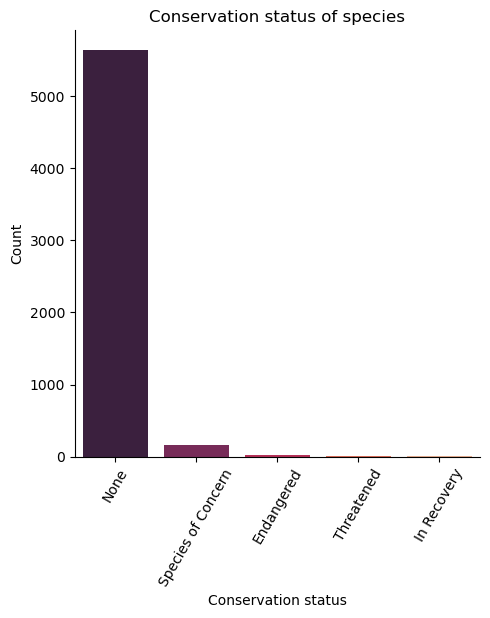

In [114]:
ax = sns.catplot(x=species['conservation_status'], data=species, kind='count', hue=species['conservation_status'], legend=False, palette='rocket')
ax.set_xticklabels(rotation=60)
ax.set_xlabels('Conservation status')
ax.set_ylabels('Count')
plt.title('Conservation status of species')
plt.show()

Plotting a countplot of the number of species classified within each conservation category results in a graph that is hard to read due to the number of species without a status.

In [115]:
endangered = species[species['conservation_status'] != 'None']
endangered.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


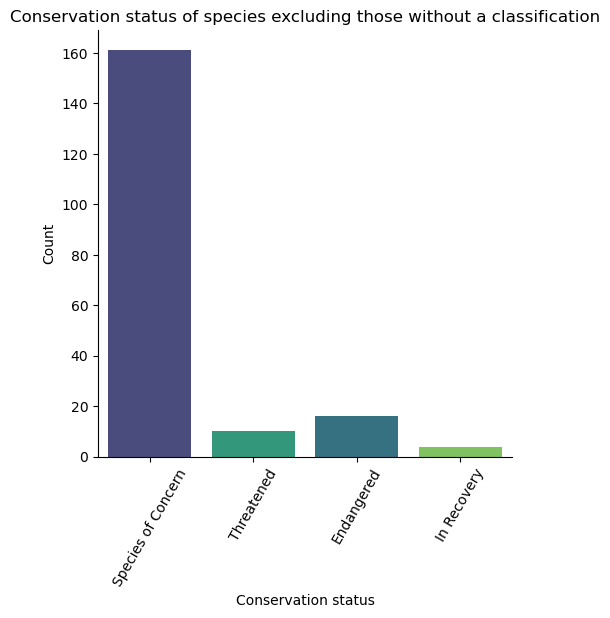

In [113]:
order1 = ['Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
ax1 = sns.catplot(x=endangered['conservation_status'], data=endangered, hue=endangered['conservation_status'], kind='count', order=order1, palette='viridis', legend=False)
ax1.set_xticklabels(rotation=60)
ax1.set_xlabels('Conservation status')
ax1.set_ylabels('Count')
plt.title('Conservation status of species excluding those without a classification')
plt.show()

Instead, subsetting and plotting solely the species with a conservation status shows us that the majority of species have been classified as `Species of Concern`, amounting to approximately 160 species, while less than 20 are `Threatened`, `Endangered` or `In Recovery` (with a count of approximately 10, 15, and 5 respectively.

### Endangered Species

Grouping the number of species by conservation status and class (depicted below) shows the distribution of species across different conservation categories. 

To focus particularly on the proportion of species categories that are considered endangered we can count the number of species of each type that have an endangered status, and compare this to the total amount of species in our dataset that are considered endangered.

In [208]:
catstat_species = species.groupby(['conservation_status', 'category']).scientific_name.count()
catstat_species

conservation_status  category         
Endangered           Amphibian               1
                     Bird                    4
                     Fish                    3
                     Mammal                  7
                     Vascular Plant          1
In Recovery          Bird                    3
                     Mammal                  1
None                 Amphibian              73
                     Bird                  442
                     Fish                  116
                     Mammal                176
                     Nonvascular Plant     328
                     Reptile                74
                     Vascular Plant       4424
Species of Concern   Amphibian               4
                     Bird                   72
                     Fish                    4
                     Mammal                 28
                     Nonvascular Plant       5
                     Reptile                 5
                     

In [209]:
end_species = catstat_species.loc['Endangered'].astype('float64')
end_species

category
Amphibian         1.0
Bird              4.0
Fish              3.0
Mammal            7.0
Vascular Plant    1.0
Name: scientific_name, dtype: float64

In [234]:
counts = species.groupby('conservation_status').category.count()
proportion_end = []
names_end = []
for index, row in end_species.items():
        proportion_end.append(row / counts['Endangered'])
        names_end.append(index)
print(proportion_end)
print(names_end)

[0.0625, 0.25, 0.1875, 0.4375, 0.0625]
['Amphibian', 'Bird', 'Fish', 'Mammal', 'Vascular Plant']


The pie chart below shows the result of calculating the proportions; the class with the greatest number of species considered endangered is the mammals class, while vascular plants and amphibians both take the smallest share. It must also be noted that there is no species of nonvascular plant that is considered endangered, suggesting there is a lower proportion of endangered species within this class.

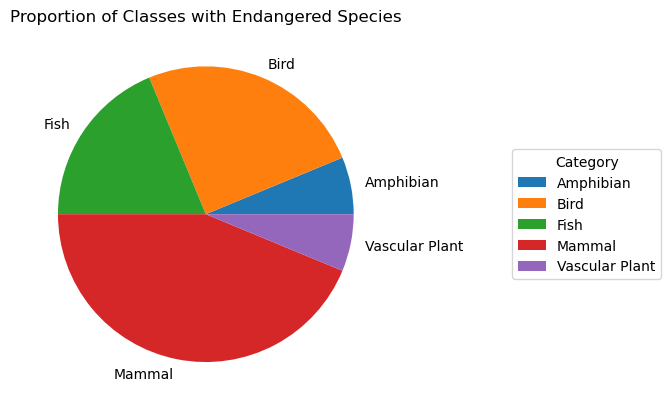

In [245]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(proportion_end, labels=names_end)
ax.legend(wedges, names_end, title='Category',  loc="center right",
          bbox_to_anchor=(0.75, 0, 1, 1))
ax.set_title('Proportion of Classes with Endangered Species')
plt.show()

In order to visually compare the distribution of endangered animals across class categories, a second pie chart can be plotted showing the proportion of species that are categorised under each class. This can be achieved in a similar way, grouping `species` solely by category.

In [238]:
cat_species = species.groupby('category').scientific_name.count()
cat_species

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

In [242]:
total_species = cat_species.sum()
proportion_cat = []
names_cat = []
for index, item in cat_species.items():
    proportion = item / total_species
    proportion_cat.append(proportion)
    names_cat.append(index)
print(proportion_eng, name_cat)

[0.013736263736263736, 0.08945741758241758, 0.02180631868131868, 0.036744505494505496, 0.0571771978021978, 0.01356456043956044, 0.7675137362637363] ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']


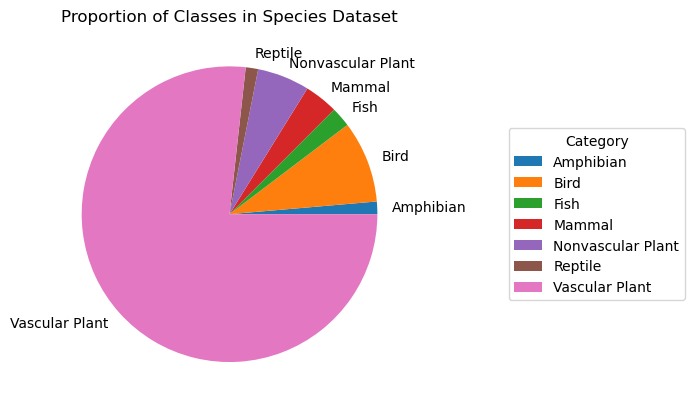

In [246]:
fig1, ax1 = plt.subplots(subplot_kw=dict(aspect="equal"))
wedges, texts = ax1.pie(proportion_cat, labels=names_cat)
ax1.legend(wedges, names_cat, title='Category',  loc="center right",
          bbox_to_anchor=(0.75, 0, 1, 1))
ax1.set_title('Proportion of Classes in Species Dataset')
plt.show()

The pie chart above represents graphically the proportion of species in `species` that belong to each category. Over three quarters of species are classified under vascular plant, while the next largest proportions belong to birds, nonvascular plants and mammals in that order.

### Parks

The next question being explored is: are certain parks more likely to house endangered species? This can begin to be answered by creating a new column called `under_protection` that returns True for any species that has a value within `conservation_status` other than None.

In [258]:
# Creating a new column to determine if a species is under conservation
species['under_protection'] = species['conservation_status'] != 'None'
species.head(10)

,category,scientific_name,common_names,conservation_status,under_protection
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,False
1,Mammal,Bos bison,"American Bison, Bison",None,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",None,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,None,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,None,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",None,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",None,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",None,False


In [283]:
# Merging across the two datasets to form a dataframe for each species observed at each park
parks = species.merge(observations, on='scientific_name')
parks.head(10)

,category,scientific_name,common_names,conservation_status,under_protection,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,None,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",None,False,Yosemite National Park,128
5,Mammal,Bos bison,"American Bison, Bison",None,False,Yellowstone National Park,269
6,Mammal,Bos bison,"American Bison, Bison",None,False,Bryce National Park,68
7,Mammal,Bos bison,"American Bison, Bison",None,False,Great Smoky Mountains National Park,77
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None,False,Bryce National Park,99
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",None,False,Yosemite National Park,124


In [271]:
print('Names of the parks observed: ', parks['park_name'].unique())
print('Shape of dataframe: ', parks.shape)

Names of the parks observed:  ['Bryce National Park' 'Yellowstone National Park'
 'Great Smoky Mountains National Park' 'Yosemite National Park']
Shape of dataframe:  (25632, 7)


The newly formed `parks` dataframe contains information about all the species that have been observed at one or more national park. Here we can see that some species, such as the American Bison, have been observed at all four parks.

In [276]:
parks.duplicated().sum()

31

In [281]:
parks = parks.drop_duplicates()
print('Updated shape of dataframe: ', parks.shape)

Updated shape of dataframe:  (25601, 7)


In [298]:
parks_protection = parks.groupby(['park_name', 'under_protection']).observations.sum()
parks_protection = parks_protection.reset_index()
parks_protection

,park_name,under_protection,observations
0,Bryce National Park,False,614682
1,Bryce National Park,True,18609
2,Great Smoky Mountains National Park,False,462047
3,Great Smoky Mountains National Park,True,12816
4,Yellowstone National Park,False,1543058
5,Yellowstone National Park,True,44583
6,Yosemite National Park,False,922539
7,Yosemite National Park,True,26913


In [299]:
crosstab = pd.pivot_table(parks_protection, values='observations', index='park_name', columns='under_protection')
crosstab

under_protection,False,True
park_name,,
Bryce National Park,614682.0,18609.0
Great Smoky Mountains National Park,462047.0,12816.0
Yellowstone National Park,1543058.0,44583.0
Yosemite National Park,922539.0,26913.0


It is clear that Yellowstone National Park has the highest absolute number of individuals observed that belong to a species that is under protection. However, absolute values do not tell us the whole story. Instead, testing the relationship between protection status and parks can give us a clearer answer to the question that has been posed.

#### Statistical Significance

In order to answer the question appropriately, this section will run some chi-squared tests to see if different parks have statistically significant differences in protection rates. These tests will focus specifically on the relationship between Yellowstone National Parks and the other three national parks. 

The first contingency table created in order to run the chi-squared test should look as follows:

||under protection|not under protection|
|-|-|-|
|Yellowstone|?|?|
|Yosemite|?|?|

The first test will be called `contingency1` and will be filled with the corresponding observation values as obtained from the `park_protection` dataset. These tests will use the standard significance level (0.05) to test the relationships.

In [301]:
from scipy.stats import chi2_contingency
contingency1 = [[44583, 1543058],
                [26913, 922539]]
chi2, pval, dof, expected = chi2_contingency(contingency1)
pval

0.21935451564379463

The p-value returned by the chi-square test is 0.22, which is more than four times 0.05. This means that in the case of Yellowstone National Park and Yosemite National Park, there does not seem to be a significant relationship between them, suggesting the null hypothesis can be accepted, and thus the variables are independent.

The second contingency table created in order to run the chi-squared test will be called `contingency2` and should look as follows:

||under protection|not under protection|
|-|-|-|
|Yellowstone|?|?|
|Bryce|?|?|

Here the p-value is much lower than the standard significance level, suggesting that there is a relationship between the parks and the conservation status of species that have been observed in each. Yellowstone National Park is shown to have a statistically significant lower rate of needed protection compared to Bryce National Park.

In [304]:
contingency2 = [[44583, 1543058],
                [18609, 614682]]
chi22, pval2, dof2, expected2 = chi2_contingency(contingency2)
pval2

1.3656932240949637e-07

The final contingency table created will be called `contingency3` and should look as follows:

||under protection|not under protection|
|-|-|-|
|Yellowstone|?|?|
|Great Smoky Mountains|?|?|

Much like in the previous example, the p-value is much lower than 0.05, suggesting that there is a relationship between the parks and the conservation status of species that have been observed in each. This means that, in comparison to Smoky Mountains National Park, Yellowstone National Park is shown to have a statistically significant lower rate of animals observed which are under protection.

In [305]:
contingency3 = [[44583, 1543058],
                [12816, 462047]]
chi23, pval3, dof3, expected3 = chi2_contingency(contingency3)
pval3

6.060129626120777e-05

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.

## Conclusion

Throughout this project several data visualisations and inferences were made about the various species observed in four of the USA's National Parks.

In doing this, the project was able to answer some of the questions posed in its introduction.

- What is the distribution of conservation status for species?

Although most species had no conservation status (5633 compared to 191), out of the species with a conservation status, the majority were classed as `Species of Concern`, with a count of 161, 145 greater than `Endangered`, the next largest category.
  
- Are certain types of species more likely to be endangered?

Mammals and birds had the heighest percentage of being endangered. Comparing this to the total proportion of species in each class suggests mammals and birds may be more likely to be endangered than classes that observed smaller proportions of endangered species byt larger total population proportions, such as vascular plants and nonvascular plants.

- Are the differences between parks and the amount of species observed to have a conservation status significant?

While Yellowstone National Park and Yosemite National Park did not have a significant difference in conservation percentage, Yellowstone and Bryce National Park as well as Yellowstone and Great Smoky Mountains National Park exhibited a statistically significant difference.

## Further Research

Though this project delved into the distributions of conservation status and taxonomical class of species, the dataset only covers the observations undertaken in a week, limiting the scope for analysis of changes over time. This could be an interesting area for further research, as the conservation status of an animal is able to change over the long run.

Furthermore, obtaining data concerning the spatial distribution of species within each park could be useful; some parks, such as Yellowstone, are larger than others and could therefore expect to see a higher level of biodiversity within it that is not taken into consideration through this dataset.